In [9]:
import pyodbc
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
conn = pyodbc.connect(r'DRIVER={ODBC Driver 17 for SQL Server};SERVER=FERNANDO\MSSQLSERVER02;DATABASE=bd_movistar;Trusted_Connection=yes')
query = '''

SELECT * FROM clientes_movistar;

'''
df = pd.read_sql(query, conn)
df

C:\Users\nando\AppData\Local\Temp\ipykernel_19688\1321125109.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id_cliente,edad,genero,antiguedad_meses,plan_actual,factura_mensual,uso_datos_gb,llamadas_minutos,servicio_atencion,reclamos,churn
0,1,56,Femenino,51,Fibra,121.73,23.66,870,2,2,False
1,2,69,Masculino,81,Postpago,91.75,24.03,1812,0,1,False
2,3,46,Masculino,5,Dúo,93.77,22.86,1050,2,1,False
3,4,32,Femenino,29,Postpago,186.62,18.20,383,1,0,False
4,5,60,Masculino,4,Trío,191.54,65.92,271,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...
495,496,65,Masculino,117,Trío,81.04,27.07,1490,3,1,False
496,497,42,Femenino,88,Fibra,60.89,5.57,1289,4,0,False
497,498,57,Femenino,33,Dúo,179.07,57.15,456,4,1,False
498,499,62,Masculino,49,Fibra,162.15,29.10,448,0,2,False


#VIENDO LA ESTRUCTURA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_cliente         500 non-null    int64  
 1   edad               500 non-null    int64  
 2   genero             500 non-null    object 
 3   antiguedad_meses   500 non-null    int64  
 4   plan_actual        500 non-null    object 
 5   factura_mensual    500 non-null    float64
 6   uso_datos_gb       500 non-null    float64
 7   llamadas_minutos   500 non-null    int64  
 8   servicio_atencion  500 non-null    int64  
 9   reclamos           500 non-null    int64  
 10  churn              500 non-null    bool   
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 39.7+ KB


#Estadisticas

In [6]:
df.describe()

,id_cliente,edad,antiguedad_meses,factura_mensual,uso_datos_gb,llamadas_minutos,servicio_atencion,reclamos
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.220000,57.794000,133.889540,49.526140,1078.204000,2.010000,0.984000
std,144.481833,15.036082,35.056433,62.719005,29.182832,563.161942,1.426172,0.827716
min,1.000000,18.000000,1.000000,20.080000,1.020000,50.000000,0.000000,0.000000
25%,125.750000,32.000000,27.000000,79.010000,23.327500,574.250000,1.000000,0.000000
50%,250.500000,45.000000,56.000000,137.570000,49.145000,1108.000000,2.000000,1.000000
75%,375.250000,57.000000,89.000000,184.462500,75.187500,1574.250000,3.000000,2.000000
max,500.000000,69.000000,119.000000,248.960000,99.710000,1996.000000,4.000000,2.000000


#Cuantos abandonaron

In [7]:
df["churn"].value_counts()

churn
False    403
True      97
Name: count, dtype: int64

#Revisando si hay valores nulos

In [8]:
df.isnull().sum()

id_cliente           0
edad                 0
genero               0
antiguedad_meses     0
plan_actual          0
factura_mensual      0
uso_datos_gb         0
llamadas_minutos     0
servicio_atencion    0
reclamos             0
churn                0
dtype: int64

#Visualizando la distribucion de edades

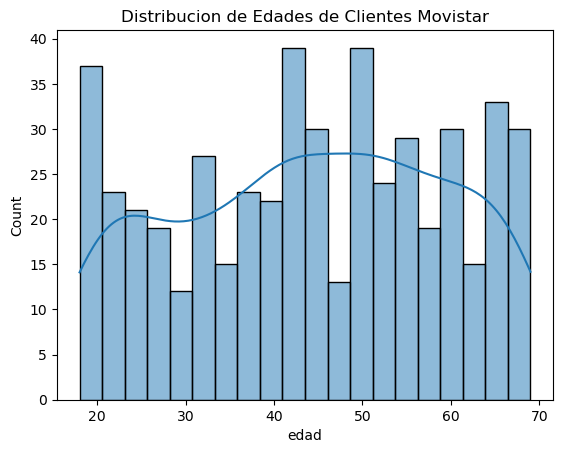

In [10]:
sns.histplot(df["edad"], bins=20, kde=True)
plt.title("Distribucion de Edades de Clientes Movistar")
plt.show()

#Clientes que abandonaron vs los que no: 

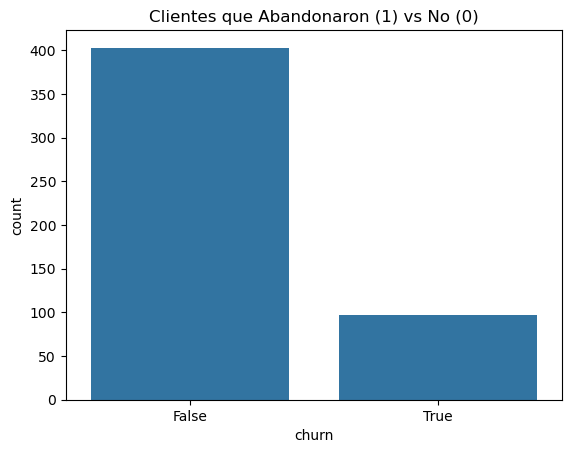

In [11]:
sns.countplot(x=df["churn"])
plt.title("Clientes que Abandonaron (1) vs No (0)")
plt.show()

#Segmentacion de clientes

In [12]:
def categorizar_cliente(row):
    if row["reclamos"] == 0 and row["servicio_atencion"] == 0:
        return "Bajo Riesgo"
    elif row["reclamos"] <= 1 and row["servicio_atencion"] <= 2:
        return "Medio Riesgo"
    else:
        return "Alto Riesgo"

df["segmento"] = df.apply(categorizar_cliente, axis=1)
print(df["segmento"].value_counts())


segmento
Alto Riesgo     300
Medio Riesgo    162
Bajo Riesgo      38
Name: count, dtype: int64


C:\Users\nando\AppData\Local\Temp\ipykernel_19688\1474989846.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["segmento"], palette="coolwarm")


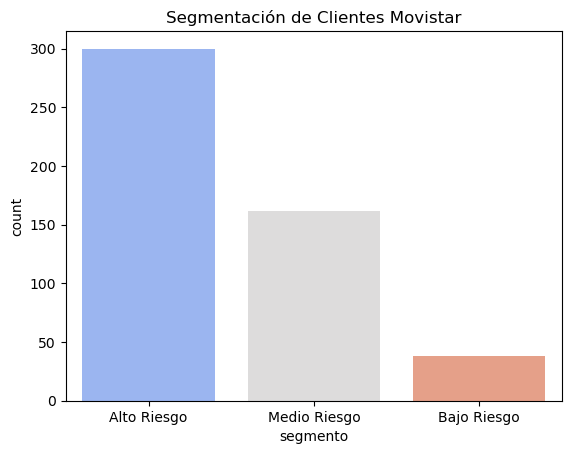

In [13]:
sns.countplot(x=df["segmento"], palette="coolwarm")
plt.title("Segmentación de Clientes Movistar")
plt.show()


#Guardando reporte final 

In [14]:
df.to_excel("reporte_movistar.xlsx", index=False)
print("Reporte guardado con éxito.")


Reporte guardado con éxito.
